# Function Y = 3X+2

In [146]:
#generating datapoints

import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*3 + 2

#gaussian noise
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.2))(y_data)

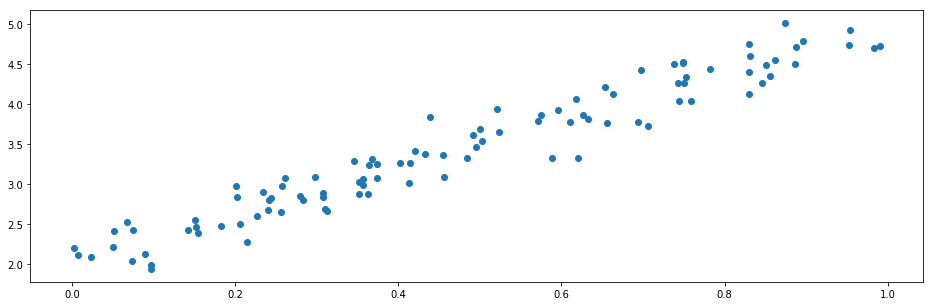

In [147]:
#plotting these points

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)

plt.scatter(x_data, y_data)
plt.show()

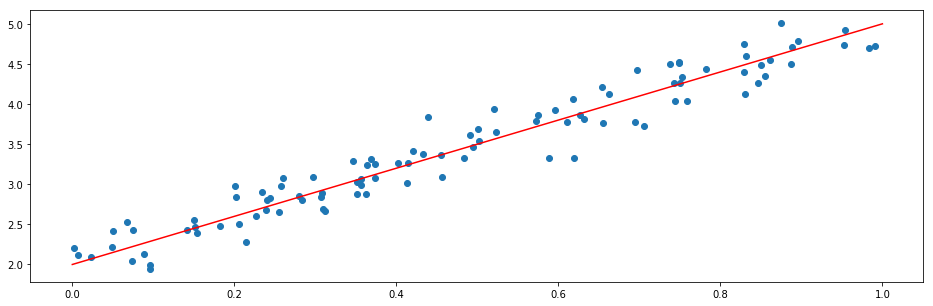

In [148]:
#expected line

#m=3 b=2

plt.scatter(x_data, y_data)
plt.plot([2,5], c='r')
plt.show()

In [149]:
#machine learning madness begins

import tensorflow as tf

In [156]:
m = tf.Variable(0.)
b = tf.Variable(0.)

y = m*x_data + b

loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    train_data = []
    
    #epochs
    for steps in range(80000):
        evals = sess.run([train,m,b])[1:]
        if steps % 2500 == 0:
            print('steps {} of 50000 complete, current value {}' .format(steps, evals))
            train_data.append(evals)

steps 0 of 50000 complete, current value [0.0036682268, 0.006850978]
steps 2500 of 50000 complete, current value [1.7943614, 2.6035879]
steps 5000 of 50000 complete, current value [2.0850012, 2.464621]
steps 7500 of 50000 complete, current value [2.2987242, 2.3572047]
steps 10000 of 50000 complete, current value [2.457443, 2.2774236]
steps 12500 of 50000 complete, current value [2.5753133, 2.2181735]
steps 15000 of 50000 complete, current value [2.6628494, 2.174172]
steps 17500 of 50000 complete, current value [2.727861, 2.1414967]
steps 20000 of 50000 complete, current value [2.7761407, 2.1172307]
steps 22500 of 50000 complete, current value [2.8119893, 2.0992126]
steps 25000 of 50000 complete, current value [2.8386075, 2.085832]
steps 27500 of 50000 complete, current value [2.8583717, 2.0759006]
steps 30000 of 50000 complete, current value [2.8730292, 2.0685256]
steps 32500 of 50000 complete, current value [2.883916, 2.0630736]
steps 35000 of 50000 complete, current value [2.8919942,

In [162]:
# final values after training

train_data[-1]

[2.9142957, 2.0478027]

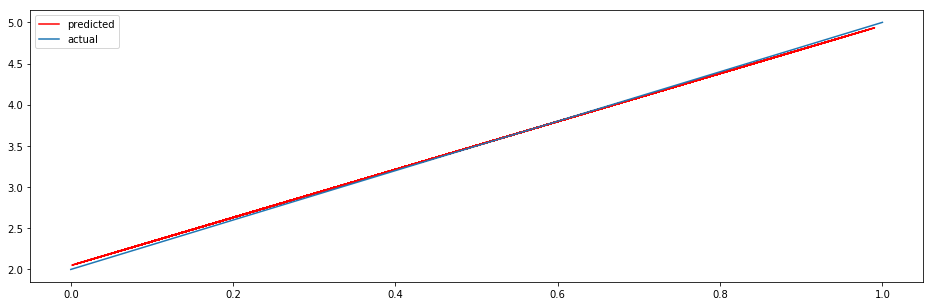

In [177]:
plt.plot(x_data, train_data[-1][0]*x_data + train_data[-1][1], 'r', label='predicted')
plt.plot([2,5], label='actual')
plt.legend()
plt.show()